In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv("Customer Data.csv",header=0)

In [3]:
customer_df.head()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance
0,18089141,Y,12,1,368.84,161.0
1,4482047,Y,15,2,118.90,8.0
2,18201629,Y,4,1,99.90,86.0
3,18116939,Y,11,1,29.92,80.0
4,9125409,Y,4,21,1785.23,10.0


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
Customer ID               200000 non-null int64
Mail Deliverable          200000 non-null object
Lifetime Recency          200000 non-null int64
Lifetime Frequency        200000 non-null int64
Lifetime Monetary         200000 non-null float64
Closest store distance    197159 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ MB


In [5]:
len(customer_df['Customer ID'].unique())

200000

In [6]:
# percent missing values in customer data
round(100*(customer_df.isnull().sum())/len(customer_df), 2)

Customer ID               0.00
Mail Deliverable          0.00
Lifetime Recency          0.00
Lifetime Frequency        0.00
Lifetime Monetary         0.00
Closest store distance    1.42
dtype: float64

In [7]:
missing_count = customer_df['Closest store distance'].isnull().sum()
missing_count

2841

In [8]:
customer_df['Closest store distance'].describe()

count    197159.000000
mean         43.918507
std          50.164970
min           0.000000
25%          10.000000
50%          22.000000
75%          62.000000
max         299.000000
Name: Closest store distance, dtype: float64

C:\Users\PRANJAL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\PRANJAL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


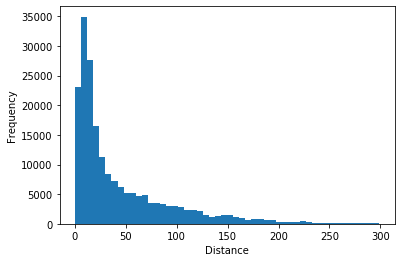

In [9]:
plt.hist(customer_df['Closest store distance'], bins=50)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

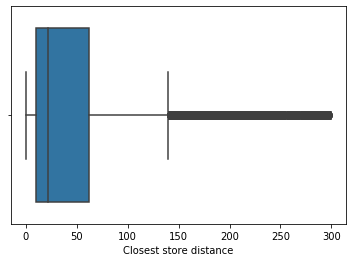

In [10]:
sns.boxplot(x=customer_df["Closest store distance"])
plt.show()

In [11]:
# impute missing distance enteries with mean distance
mean_distance = customer_df['Closest store distance'].mean()
customer_df['Closest store distance'] = customer_df['Closest store distance'].fillna(mean_distance)

In [12]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
Customer ID               200000 non-null int64
Mail Deliverable          200000 non-null object
Lifetime Recency          200000 non-null int64
Lifetime Frequency        200000 non-null int64
Lifetime Monetary         200000 non-null float64
Closest store distance    200000 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.2+ MB


In [13]:
purchase_df = pd.read_csv("Purchase Data.csv",header = 0)

C:\Users\PRANJAL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508658 entries, 0 to 508657
Data columns (total 8 columns):
Customer ID    508658 non-null int64
Date           508658 non-null object
Product        508658 non-null object
Units          508658 non-null int64
Amount         508655 non-null float64
Cost           508658 non-null float64
Channel        508658 non-null object
Store          508658 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 31.0+ MB


In [15]:
purchase_df.head()

,Customer ID,Date,Product,Units,Amount,Cost,Channel,Store
0,1806560,19/09/2019,APPAREL,1,29.97,20.00,Internet,~
1,1806560,19/09/2019,APPAREL,1,29.97,38.00,Internet,~
2,1806560,19/09/2019,APPAREL,1,29.98,27.25,Internet,~
3,1806560,19/09/2019,APPAREL,1,24.97,15.00,Internet,~
4,1806560,19/09/2019,APPAREL,1,39.98,19.00,Internet,~


In [16]:
purchase_df.shape

(508658, 8)

In [17]:
len(purchase_df['Customer ID'].unique())

86665

In [18]:
purchase_df['Channel'].unique()

array(['Internet', 'POS Sales'], dtype=object)

In [19]:
purchase_df['Product'].unique()

array(['APPAREL', 'ACCESSORIES', 'NOVELTY', 'PERSONAL CARE', 'JEWELRY',
       'FOOTWEAR', 'BEAUTY', 'BATH & BODY'], dtype=object)

In [20]:
purchase_df['Store'].unique()

array(['~', '37', '17', '15', '74', '10', '33', '23', '20', '45', '55',
       '22', '24', '26', '14', '13', '40', '36', '62', '67', '53', '56',
       '81', '52', '6', '1', '28', '51', '31', '69', '12', '72', '48',
       '35', '32', '41', '19', '58', '38', '77', '7', '57', '80', '49',
       '29', '50', '3', '47', '34', '54', '68', '76', '21', '60', '27',
       '65', '43', '70', '5', '9', '46', '39', '16', '61', '11', '59',
       '83', '63', '25', '71', '75', '2', '30', '44', '66', '73', '64',
       '18', '82', '42', '79', 19, 5, 39, 7, 60, 37, 50, 74, 14, 65, 75,
       38, 18, 9, 80, 42, 70, 31, 66, 67, 11, 63, 32, 40, 54, 46, 71, 10,
       61, 6, 16, 25, 59, 43, 13, 68, 62, 33, 27, 81, 1, 55, 82, 44, 48,
       26, 52, 72, 51, 28, 69, 15, 64, 22, 30, 56, 49, 58, 24, 73, 17, 23,
       29, 3, 35, 20, 76, 12, 45, 47, 21, 83, 36, 79, 41, 53, 34, 2, 57,
       77], dtype=object)

In [21]:
purchase_df["Store"] = purchase_df["Store"].replace("~", "999")

In [22]:
purchase_df['Store'].unique()

array(['999', '37', '17', '15', '74', '10', '33', '23', '20', '45', '55',
       '22', '24', '26', '14', '13', '40', '36', '62', '67', '53', '56',
       '81', '52', '6', '1', '28', '51', '31', '69', '12', '72', '48',
       '35', '32', '41', '19', '58', '38', '77', '7', '57', '80', '49',
       '29', '50', '3', '47', '34', '54', '68', '76', '21', '60', '27',
       '65', '43', '70', '5', '9', '46', '39', '16', '61', '11', '59',
       '83', '63', '25', '71', '75', '2', '30', '44', '66', '73', '64',
       '18', '82', '42', '79', 19, 5, 39, 7, 60, 37, 50, 74, 14, 65, 75,
       38, 18, 9, 80, 42, 70, 31, 66, 67, 11, 63, 32, 40, 54, 46, 71, 10,
       61, 6, 16, 25, 59, 43, 13, 68, 62, 33, 27, 81, 1, 55, 82, 44, 48,
       26, 52, 72, 51, 28, 69, 15, 64, 22, 30, 56, 49, 58, 24, 73, 17, 23,
       29, 3, 35, 20, 76, 12, 45, 47, 21, 83, 36, 79, 41, 53, 34, 2, 57,
       77], dtype=object)

In [23]:
purchase_df['Store'] = purchase_df['Store'].astype(int)

In [24]:
def find_missing_store_number(unique_arr):
    n = len(unique_arr) + 1
    expected_sum = (n * (n + 1)) // 2
    actual_sum = sum(unique_arr)
    missing_number = expected_sum - actual_sum
    return missing_number

In [25]:
def find_missing_numbers(unique_arr):
    min_num = min(unique_arr)
    max_num = max(unique_arr)
    new_arr = [0] * (max_num - min_num + 1)
    for num in arr:
        new_arr[num - min_num] = 1
    missing_numbers = []
    for i in range(len(new_arr)):
        if new_arr[i] == 0:
            missing_numbers.append(i + min_num)
    return missing_numbers


In [26]:
import numpy as np
arr = purchase_df.loc[purchase_df["Store"] != 999, "Store"].values.astype(np.int32)
unique_arr = np.unique(arr)
missing_numbers = find_missing_numbers(unique_arr)
print(missing_numbers)


[4, 8, 78]


In [27]:
#check for missing values in purchase data
round(100*(purchase_df.isnull().sum())/len(purchase_df), 2)

Customer ID    0.0
Date           0.0
Product        0.0
Units          0.0
Amount         0.0
Cost           0.0
Channel        0.0
Store          0.0
dtype: float64

### Prepare Data for modelling

In [47]:
# merge customer data and purchase data
# merge the two data frames on the 'Customer ID' column
merged_df = pd.merge(customer_df, purchase_df, on='Customer ID', how='inner')

# drop duplicate rows if any
merged_df.drop_duplicates()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance,Date,Product,Units,Amount,Cost,Channel,Store
0,4482047,Y,15,2,118.90,8.0,07/06/2019,APPAREL,1,108.95,23.00,Internet,999
1,6564872,Y,4,6,1785.20,13.0,13/12/2019,APPAREL,1,69.95,16.31,Internet,999
2,7004515,Y,11,23,2068.93,23.0,21/11/2019,APPAREL,1,119.95,39.75,Internet,999
3,7004515,Y,11,23,2068.93,23.0,20/07/2019,APPAREL,1,59.95,14.75,Internet,999
4,6429944,Y,11,8,2813.77,9.0,12/11/2019,APPAREL,1,79.95,15.76,Internet,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508653,2930907,Y,18,1,99.90,175.0,20/04/2019,APPAREL,1,76.46,13.80,Internet,999
508654,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,39.99,27.25,Internet,999
508655,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,49.99,21.00,Internet,999
508656,18077839,Y,13,2,229.86,24.0,31/08/2019,APPAREL,1,59.99,20.16,Internet,999


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508658 entries, 0 to 508657
Data columns (total 13 columns):
Customer ID               508658 non-null int64
Mail Deliverable          508658 non-null object
Lifetime Recency          508658 non-null int64
Lifetime Frequency        508658 non-null int64
Lifetime Monetary         508658 non-null float64
Closest store distance    508658 non-null float64
Date                      508658 non-null object
Product                   508658 non-null object
Units                     508658 non-null int64
Amount                    508655 non-null float64
Cost                      508658 non-null float64
Channel                   508658 non-null object
Store                     508658 non-null int32
dtypes: float64(4), int32(1), int64(4), object(4)
memory usage: 52.4+ MB


In [49]:
#convert date to proper datatype
import datetime as dt
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [50]:
merged_df['Mail Deliverable'].unique()

array(['Y', 'N'], dtype=object)

In [51]:
merged_df["Mail Deliverable"] = merged_df["Mail Deliverable"].replace("Y", "1")
merged_df["Mail Deliverable"] = merged_df["Mail Deliverable"].replace("N", "0")

In [52]:
merged_df['Mail Deliverable'].unique()

array(['1', '0'], dtype=object)

In [53]:
merged_df['Mail Deliverable'] = merged_df['Mail Deliverable'].astype(int)

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508658 entries, 0 to 508657
Data columns (total 13 columns):
Customer ID               508658 non-null int64
Mail Deliverable          508658 non-null int32
Lifetime Recency          508658 non-null int64
Lifetime Frequency        508658 non-null int64
Lifetime Monetary         508658 non-null float64
Closest store distance    508658 non-null float64
Date                      508658 non-null datetime64[ns]
Product                   508658 non-null object
Units                     508658 non-null int64
Amount                    508655 non-null float64
Cost                      508658 non-null float64
Channel                   508658 non-null object
Store                     508658 non-null int32
dtypes: datetime64[ns](1), float64(4), int32(2), int64(4), object(2)
memory usage: 50.4+ MB


In [69]:
# add month and quarter columns
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Quarter'] = merged_df['Date'].dt.quarter
merged_df['Year'] = merged_df['Date'].dt.year

In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508658 entries, 0 to 508657
Data columns (total 16 columns):
Customer ID               508658 non-null int64
Mail Deliverable          508658 non-null int32
Lifetime Recency          508658 non-null int64
Lifetime Frequency        508658 non-null int64
Lifetime Monetary         508658 non-null float64
Closest store distance    508658 non-null float64
Date                      508658 non-null datetime64[ns]
Product                   508658 non-null object
Units                     508658 non-null int64
Amount                    508655 non-null float64
Cost                      508658 non-null float64
Channel                   508658 non-null object
Store                     508658 non-null int32
Month                     508658 non-null int64
Quarter                   508658 non-null int64
Year                      508658 non-null int64
dtypes: datetime64[ns](1), float64(4), int32(2), int64(7), object(2)
memory usage: 62.1+ MB


### EDA questions

#### Q1. Aggregate the revenue and quantity at customer level for relevant time period along with the reason of time period selection

To aggregate revenue and quantity at the customer level, we need to first identify the relevant time period for analysis

1.Monthly: Aggregating the data at the monthly level can provide insights into trends over time and seasonal variations.

2.Quarterly: Aggregating the data at the quarterly level can provide a higher-level view of performance and may be useful for reporting purposes.

3.Annual: Aggregating the data at the annual level can provide a high-level overview of performance for the entire year.

In [65]:
monthly_df = merged_df.groupby(['Customer ID', 'Month']).agg({'Amount': 'sum','Units': 'sum'}).reset_index()

In [66]:
monthly_df.head()

,Customer ID,Month,Amount,Units
0,1806560,9,234.84,7
1,1806593,1,278.85,3
2,1806727,1,108.95,1
3,1806727,4,508.70,6
4,1806727,10,79.95,1


In [67]:
quarterly_df = merged_df.groupby(['Customer ID', 'Quarter']).agg({'Amount': 'sum','Units': 'sum'}).reset_index()

In [68]:
quarterly_df.head()

,Customer ID,Quarter,Amount,Units
0,1806560,3,234.84,7
1,1806593,1,278.85,3
2,1806727,1,108.95,1
3,1806727,2,508.70,6
4,1806727,4,79.95,1


In [71]:
yearly_df = merged_df.groupby(['Customer ID', 'Year']).agg({'Amount': 'sum','Units': 'sum'}).reset_index()

In [72]:
yearly_df.head()

,Customer ID,Year,Amount,Units
0,1806560,2019,234.84,7
1,1806593,2019,278.85,3
2,1806727,2019,697.60,8
3,1806735,2019,177.85,3
4,1806741,2019,164.80,4


In [82]:
avg_order_value_per_customer = merged_df.groupby(['Customer ID']).agg({'Amount': 'mean'}).reset_index()
avg_order_value_per_customer.head()

,Customer ID,Amount
0,1806560,33.548571
1,1806593,92.950000
2,1806727,87.200000
3,1806735,88.925000
4,1806741,41.200000


In [36]:
# compute the max date
max_date = max(merged_df['Date'])
max_date

Timestamp('2019-12-31 00:00:00')

In [37]:
# compute the diff
merged_df['diff'] = max_date - merged_df['Date']
merged_df.head()

,Customer ID,Mail Deliverable,Lifetime Recency,Lifetime Frequency,Lifetime Monetary,Closest store distance,Date,Product,Units,Amount,Cost,Channel,Store,diff
0,4482047,1,15,2,118.90,8.0,2019-06-07,APPAREL,1,108.95,23.00,Internet,999,207 days
1,6564872,1,4,6,1785.20,13.0,2019-12-13,APPAREL,1,69.95,16.31,Internet,999,18 days
2,7004515,1,11,23,2068.93,23.0,2019-11-21,APPAREL,1,119.95,39.75,Internet,999,40 days
3,7004515,1,11,23,2068.93,23.0,2019-07-20,APPAREL,1,59.95,14.75,Internet,999,164 days
4,6429944,1,11,8,2813.77,9.0,2019-11-12,APPAREL,1,79.95,15.76,Internet,999,49 days


In [38]:
# monetary
grouped_df = merged_df.groupby('Customer ID')['Lifetime Monetary'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,Customer ID,Lifetime Monetary
0,1806560,27763.19
1,1806593,4314.69
2,1806727,16492.96
3,1806735,1822.02
4,1806741,11842.16


In [39]:
merged_df.columns

Index(['Customer ID', 'Mail Deliverable', 'Lifetime Recency',
       'Lifetime Frequency ', 'Lifetime Monetary', 'Closest store distance',
       'Date', 'Product', 'Units', 'Amount', 'Cost', 'Channel', 'Store',
       'diff'],
      dtype='object')

In [40]:
# frequency
frequency = merged_df.groupby('Customer ID')['Lifetime Frequency '].count()
frequency = frequency.reset_index()
frequency.columns = ['Customer ID', 'Lifetime Frequency ']
frequency.head()

,Customer ID,Lifetime Frequency
0,1806560,7
1,1806593,3
2,1806727,8
3,1806735,2
4,1806741,4


In [41]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='Customer ID', how='inner')
grouped_df.head()

,Customer ID,Lifetime Monetary,Lifetime Frequency
0,1806560,27763.19,7
1,1806593,4314.69,3
2,1806727,16492.96,8
3,1806735,1822.02,2
4,1806741,11842.16,4


In [42]:
recency = merged_df.groupby('Customer ID')['Lifetime Recency'].min()
recency = recency.reset_index()
recency.columns = ['Customer ID', 'Lifetime Recency']
recency.head()

,Customer ID,Lifetime Recency
0,1806560,2
1,1806593,3
2,1806727,1
3,1806735,1
4,1806741,18


In [43]:
grouped_df = pd.merge(grouped_df, recency, on='Customer ID', how='inner')
grouped_df.head()

,Customer ID,Lifetime Monetary,Lifetime Frequency,Lifetime Recency
0,1806560,27763.19,7,2
1,1806593,4314.69,3,3
2,1806727,16492.96,8,1
3,1806735,1822.02,2,1
4,1806741,11842.16,4,18


{'whiskers': [<matplotlib.lines.Line2D at 0x1a3009a9d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3009781c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3009a9850>],
 'medians': [<matplotlib.lines.Line2D at 0x1a300978d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a300978f10>],
 'means': []}

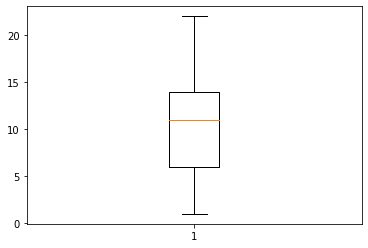

In [44]:
plt.boxplot(grouped_df['Lifetime Recency'])

In [45]:
grouped_df['Lifetime Frequency '].max()

125473

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3000a7be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a300a830a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3000a7580>],
 'medians': [<matplotlib.lines.Line2D at 0x1a3009de6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a3009de160>],
 'means': []}

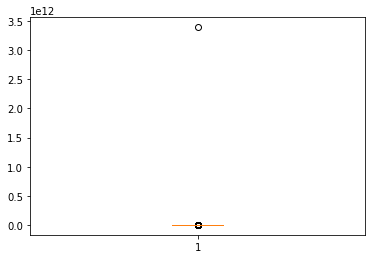

In [46]:
plt.boxplot(grouped_df['Lifetime Monetary'])

In [47]:
grouped_df['Lifetime Monetary'].max()

3394273471340.0625

In [48]:
grouped_df.head()

,Customer ID,Lifetime Monetary,Lifetime Frequency,Lifetime Recency
0,1806560,27763.19,7,2
1,1806593,4314.69,3,3
2,1806727,16492.96,8,1
3,1806735,1822.02,2,1
4,1806741,11842.16,4,18


In [49]:
grouped_df = grouped_df.rename(columns={'Lifetime Monetary': 'Lifetime_Monetary','Lifetime Frequency ':'Lifetime_Frequency','Lifetime Recency':'Lifetime_Recency'})

In [50]:
# removing (statistical) outliers
Q1 = grouped_df.Lifetime_Monetary.quantile(0.05)
Q3 = grouped_df.Lifetime_Monetary.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Lifetime_Monetary >= Q1 - 1.5*IQR) & (grouped_df.Lifetime_Monetary <= Q3 + 1.5*IQR)]


In [51]:
# outlier treatment for recency
Q1 = grouped_df.Lifetime_Recency.quantile(0.05)
Q3 = grouped_df.Lifetime_Recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Lifetime_Recency >= Q1 - 1.5*IQR) & (grouped_df.Lifetime_Recency <= Q3 + 1.5*IQR)]


In [52]:
# outlier treatment for frequency
Q1 = grouped_df.Lifetime_Frequency.quantile(0.05)
Q3 = grouped_df.Lifetime_Frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Lifetime_Frequency >= Q1 - 1.5*IQR) & (grouped_df.Lifetime_Frequency <= Q3 + 1.5*IQR)]


In [53]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [54]:
# rescaling
rfm_df = grouped_df[['Lifetime_Monetary', 'Lifetime_Frequency', 'Lifetime_Recency']]

# instantiate
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(84948, 3)

In [55]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary','Frequency','Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,0.551246,0.818600,-1.499471
1,-0.314798,-0.213365,-1.315652
2,0.134993,1.076591,-1.683290
3,-0.406862,-0.471356,-1.683290
4,-0.036779,0.044626,1.441630


### Modelling

In [56]:
kmeans = KMeans(n_clusters=4,max_iter=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=4)

In [57]:
kmeans.labels_

array([1, 2, 1, ..., 0, 0, 0])

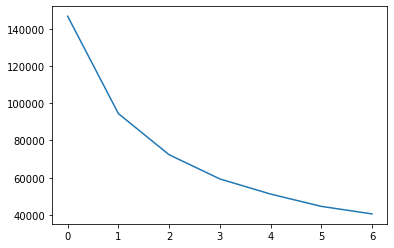

In [58]:
#elbow curve

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=100)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

### Silhouette analysis

In [59]:
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters,max_iter=100)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(rfm_df_scaled,cluster_labels)
    
    print("form n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

form n_clusters=2, the silhouette score is 0.6025414737914732
form n_clusters=3, the silhouette score is 0.42399081060340627
form n_clusters=4, the silhouette score is 0.429814135522093
form n_clusters=5, the silhouette score is 0.3826369264470941
form n_clusters=6, the silhouette score is 0.3977995795379366
form n_clusters=7, the silhouette score is 0.39866944921724645
form n_clusters=8, the silhouette score is 0.40094127975399724


In [60]:
# final model with k = 3

kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=3)

In [61]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [62]:
#assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,Customer ID,Lifetime_Monetary,Lifetime_Frequency,Lifetime_Recency,cluster_id
0,1806560,27763.19,7,2,1
1,1806593,4314.69,3,3,1
2,1806727,16492.96,8,1,1
3,1806735,1822.02,2,1,1
4,1806741,11842.16,4,18,0


<AxesSubplot:xlabel='cluster_id', ylabel='Lifetime_Monetary'>

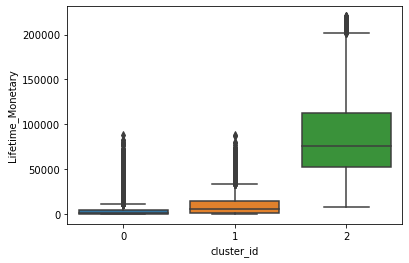

In [63]:
#plot
sns.boxplot(x = 'cluster_id',y = 'Lifetime_Monetary',data = grouped_df)

### Hierarchical Clustering

In [64]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [65]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,0.551246,0.818600,-1.499471
1,-0.314798,-0.213365,-1.315652
2,0.134993,1.076591,-1.683290
3,-0.406862,-0.471356,-1.683290
4,-0.036779,0.044626,1.441630


In [66]:
grouped_df.head()

,Customer ID,Lifetime_Monetary,Lifetime_Frequency,Lifetime_Recency,cluster_id
0,1806560,27763.19,7,2,1
1,1806593,4314.69,3,3,1
2,1806727,16492.96,8,1,1
3,1806735,1822.02,2,1,1
4,1806741,11842.16,4,18,0


In [ ]:
#single linkage
mergings = linkage(rfm_df_scaled,method="single",metric='euclidean')
dendrogram(mergings)
#plt.show()

In [ ]:
#complete linkage
mergings = linkage(rfm_df_scaled,method="complete",metric='euclidean')
dendrogram(mergings)
#plt.show()

In [ ]:
#3 clusters
cluster_labels = cut_tree(mergings,n_clusters = 3).reshape(-1, )
cluster_labels

In [ ]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

In [ ]:
sns.boxplot(x='cluster_labels',y='Lifetime_Recency',data=grouped_df)

In [ ]:
sns.boxplot(x='cluster_labels',y='Lifetime_Frequency',data=grouped_df)